# Laboratorium 3 - Recurrent Neural Network cz. I

Laboratorium jest podzielone na 2 części.


1.   Podstawy RNN i zrozumienie działania i gotowych przykładów (Zadania od 1-6)
2.   Zadania do samodzielnego zaimplementowania (Zadania do 7-8)

Proszę o rozsadne dysponowanie czasem zajęć oraz korzystać z dokumentacji Keras (oraz Sklearn) do odpowiednich datasetów.

Wykorzystywane warstwy na dzisiejszych zajeciach to:
*   Embeddings
*   **SimpleRRN**
*   **LSTM**
*   **GRU**

Oraz warstwy Dropout/Dense/Input etc. znane z poprzednich zajęć.

Warstwy GRU/LSTM będziemy wykorzystywać bardziej na najbliszych laboratoriach, stad dzis bardziej prosze skupic sie na dzialaniu sieci SimpleRNN (chyba ze ktoś jest bardziej doświadczony to może pisać bardziej skomplikowane rozwiazania w oparciu o LSTM/GRU)



# **Embeddings**

Warstwa Embeddings w Keras RNN jest często używana do przetwarzania danych tekstowych lub sekwencyjnych, takich jak sekwencje czasowe lub sekwencje obrazów. Warstwa ta służy do przekształcenia sekwencji tokenów (np. słów) w sekwencję wektorów o stałej długości, które są następnie przekazywane do warstw rekurencyjnych.

Parametrami warstwy Embeddings są między innymi:

* input_dim: liczba unikalnych tokenów w wejściu (rozmiar słownika)
* output_dim: rozmiar wektora reprezentującego każdy token
* input_length: długość sekwencji wejściowej

Przykładowo, jeśli mamy słownik o rozmiarze 10000 i chcemy przekształcić sekwencję słów o długości 20 w sekwencję wektorów o rozmiarze 50, to tworzymy warstwę Embeddings z parametrami:

* input_dim=10000
* output_dim=50
* input_length=20

Warstwa Embeddings uczy się reprezentacji wektorowej każdego tokenu na podstawie danych treningowych i dostosowuje się do nich w trakcie treningu modelu. Dzięki temu, podobne tokeny (np. synonimy) są reprezentowane przez podobne wektory, co pozwala na lepsze modelowanie semantyki tekstu w dalszych warstwach sieci neuronowej.


# **Simple RNN**

Warstwa **SimpleRNN** w Keras jest jednym z typów warstw rekurencyjnych, które umożliwiają przetwarzanie danych sekwencyjnych. Warstwa SimpleRNN składa się z jednostki rekurencyjnej, która przyjmuje na wejściu aktualną wartość sekwencji oraz jej poprzednią wartość wyjściową i zwraca aktualną wartość wyjściową.

Parametry warstwy SimpleRNN to między innymi:

* units: liczba jednostek rekurencyjnych w warstwie
* activation: funkcja aktywacji, np. sigmoid, relu, tanh
* return_sequences: czy zwrócić sekwencję wyjściową dla każdej wartości sekwencji wejściowej, czy tylko dla ostatniej

Przykładowo, jeśli mamy sekwencję danych wejściowych o długości 10 i chcemy przetworzyć ją za pomocą warstwy SimpleRNN z jednostkami rekurencyjnymi o liczbie 32, to tworzymy warstwę SimpleRNN z parametrami:

* units=32
* activation='tanh'
* return_sequences=True (jeśli chcemy otrzymać sekwencję wyjściową)

Warstwa SimpleRNN może być stosowana do różnych zadań związanych z przetwarzaniem sekwencji, takich jak modelowanie języka, rozpoznawanie mowy lub klasyfikacja sekwencji czasowych. Jedną z wad warstwy SimpleRNN jest jednak brak zdolności do przetwarzania długoterminowych zależności, co może prowadzić do problemu znikającego lub eksplodującego gradientu. W celu rozwiązania tego problemu często stosuje się bardziej zaawansowane warstwy rekurencyjne, takie jak LSTM lub GRU **(o tym więcej za tydzien)**

# Zadanie 1: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją przewidywać kolejne elementy w ciągu czasowym.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Przygotuj dane treningowe. Stwórz ciąg czasowy, który będzie składał się z 50 próbek. Wykorzystaj do tego funkcję sinus z biblioteki numpy. Na podstawie tego ciągu czasowego chcemy nauczyć sieć przewidywać kolejne elementy. Do tego celu wykorzystamy sekwencje o długości 10 próbek.

In [ ]:
timesteps = 50
data = np.sin(np.arange(timesteps))


Przygotuj dane treningowe i testowe. Przeprowadzimy uczenie z nadzorem, dlatego musimy przygotować pary wejście-wyjście dla sieci. Wejściem będzie sekwencja o długości 10 próbek, a wyjściem będzie kolejna próbka. Podziel dane na zbiór treningowy i testowy w stosunku 80:20.

In [ ]:
def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data)-timesteps-1):
        X.append(data[i:(i+timesteps)])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

X, y = prepare_data(data, 10)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Stwórz model sieci rekurencyjnej typu SimpleRNN. Ustaw liczbę neuronów w warstwie rekurencyjnej na 32, a w warstwie wyjściowej na 1. Dodaj też warstwę gęstą z jednym neuronem jako warstwę wyjściową. Wykorzystaj funkcję aktywacji 'linear' i 'mse' jako funkcję straty.


In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')


Naucz model na danych treningowych. Ustaw liczbę epok na 5 i rozmiar batcha na 16. Wykorzystaj funkcję fit.


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=16)


Epoch 1/5
2/2 [==============================] - 1s 9ms/step - loss: 0.6239
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3959
Epoch 3/5
2/2 [==============================] - 0s 11ms/step - loss: 0.2202
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 0.0990
Epoch 5/5
2/2 [==============================] - 0s 9ms/step - loss: 0.0293


Oceń jakość modelu na danych testowych. Wykorzystaj funkcję evaluate.


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

1/1 [==============================] - 0s 304ms/step - loss: 0.0039
Loss: 0.003916860558092594


Wykorzystaj model do przewidywania kolejnych elementów w ciągu czasowym. Wykorzystaj funkcję predict. Wyniki zapisz do zmiennej predictions.


In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 230ms/step


Zwizualizuj wyniki. Narysuj na jednym wykresie dane testowe oraz przewidywane wartości. Do narysowania wykresu użyj biblioteki matplotlib.

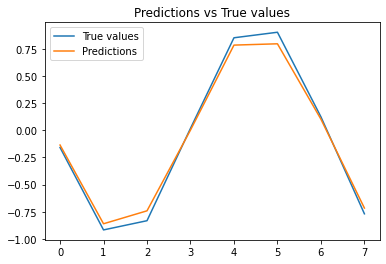

In [ ]:
import matplotlib.pyplot as plt

# narysuj dane testowe
plt.plot(y_test, label='True values')

# narysuj przewidywane wartości
plt.plot(predictions, label='Predictions')

plt.title('Predictions vs True values')
plt.legend()
plt.show()


# Zadanie 2: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją generować tekst na podstawie dostarczonego zbioru danych tekstowych.



In [ ]:
import tensorflow as tf

import numpy as np
import os
import time



In [ ]:
path_to_file = tf.keras.utils.get_file('/content/shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras.optimizers import RMSprop

# Wczytanie danych tekstowych
with open('shakespeare.txt', 'r') as f:
    text = f.read().lower()
print('Długość tekstu:', len(text))

# Tworzenie słownika znaków
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Przygotowanie sekwencji danych wejściowych i wyjściowych
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i:i + maxlen])
    next_chars.append(text[i + maxlen])
print('Liczba sekwencji:', len(sentences))

# Przygotowanie danych wejściowych i wyjściowych
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


Długość tekstu: 1115394
Liczba sekwencji: 371785


<ipython-input-46-d815f64bf0c2>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
<ipython-input-46-d815f64bf0c2>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


KeyboardInterrupt: ignored

Następnie można zdefiniować i nauczyć sieć rekurencyjną typu SimpleRNN:


In [ ]:
# Definicja modelu sieci rekurencyjnej
model = Sequential()
model.add(SimpleRNN(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Kompilacja modelu
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Nauczanie modelu
model.fit(x, y, batch_size=128, epochs=20)


Po nauczeniu sieci można zastosować ją do generowania tekstu. Poniższy kod generuje 400 znaków tekstu, korzystając z wyuczonej sieci:

In [ ]:
# Generowanie tekstu
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index:start_index + maxlen]
print('--- Początek generowanego tekstu: "' + generated_text + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
        x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]
    generated_text += next_char
    generated_text = generated_text[1:]
    
print('--- Wygenerowany tekst: "' + generated_text + '"')


# Zadanie 3: Stwórz sieć rekurencyjną typu SimpleRNN przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.



In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ustalenie hiperparametrów
max_features = 10000  # maksymalna liczba słów
maxlen = 100  # maksymalna długość sekwencji słów
batch_size = 32
embedding_dims = 50  # liczba wymiarów przestrzeni osadzeń słów
hidden_dims = 32  # liczba neuronów w warstwie ukrytej

# załadowanie danych IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# dostosowanie długości sekwencji słów
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# utworzenie modelu sieci neuronowej
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# uczenie modelu
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2
782/782 [==============================] - 38s 47ms/step - loss: 0.5055 - accuracy: 0.7514 - val_loss: 0.4337 - val_accuracy: 0.8145
Epoch 2/2
782/782 [==============================] - 40s 51ms/step - loss: 0.3281 - accuracy: 0.8664 - val_loss: 0.4047 - val_accuracy: 0.8290


In [ ]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")


Tekst: started the fact that you can tell its filmed in a forest in the middle in what seemed like the middle of summer this is ? for because the game is set in the ? rain forest whereas this looks like the director just looked out his window in the morning and went thats a good forest br br this is a note to all directors if you ever plan to make a film based on a game book play it understand it and ask fans about it don't just play it for an hour and assume you know it
Etykieta:0
1/1 [==============================] - 0s 38ms/step
Predykcja: [0.46023127]


# Zadanie 4: Stwórz sieć rekurencyjną typu LSTM przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.



In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# set hyperparameters
max_features = 10000  # maximum number of words
maxlen = 100  # maximum sequence length
batch_size = 32
embedding_dims = 50  # dimensionality of word embeddings
hidden_dims = 32  # number of neurons in the hidden layer

# load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# adjust sequence lengths
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# build the neural network model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(hidden_dims))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2
782/782 [==============================] - 64s 79ms/step - loss: 0.4121 - accuracy: 0.8050 - val_loss: 0.3421 - val_accuracy: 0.8502
Epoch 2/2
782/782 [==============================] - 75s 95ms/step - loss: 0.2566 - accuracy: 0.8975 - val_loss: 0.3743 - val_accuracy: 0.8482


In [ ]:
# Przygotowanie słownika mapowania identyfikatorów słów na słowa
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Wybór losowej sekwencji tekstowej z testowego zestawu danych
sample = np.random.randint(len(x_test))
text = x_test[sample]
label = y_test[sample]

# Wartości w zakresie 0-2 są zarezerwowane dla specjalnych znaków, zacznijmy od indeksu 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(f"Tekst: {decoded_review}")
print(f"Etykieta:{label}")

# Dokonanie predykcji na przykładowych danych
prediction = model.predict(np.array([text]))
print(f"Predykcja: {prediction[0]}")


Tekst: howard hughes in his all too successful effort to kill off rko radio pictures br br the movie kills its first opportunity to show off sexy jane when it places her in a bubble bath and then has her singing i'll be switched if i ain't ? ? and it's all downhill from there in her autobiography russell ? for the movie's number ? for trouble because it was supposedly so ? nowadays you could show it on the disney channel by the way said autobiography has a jaw dropping photo of russell in a bikini far ? than anything
Etykieta:0
1/1 [==============================] - 1s 645ms/step
Predykcja: [0.02273359]


# Zadanie 5: Stwórz sieć rekurencyjną (z wykorzystaniem GRU) przy użyciu biblioteki Keras i naucz ją klasyfikować tekst na podstawie dostarczonego zbioru danych tekstowych.


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 20000  # Liczba słów, które chcemy zastosować w analizie
maxlen = 80  # Maksymalna liczba słów w recenzji
batch_size = 32  # Liczba recenzji przetwarzana jednocześnie

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Dopełnij recenzje zerami, jeśli są za krótkie, lub obetnij, jeśli są za długie
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Model sieci rekurencyjnej z GRU
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trenowanie modelu
print('Training...')
model.fit(input_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(input_test, y_test))

# Ocena modelu
scores = model.evaluate(input_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


25000 train sequences
25000 test sequences
input_train shape: (25000, 80)
input_test shape: (25000, 80)
Training...
Epoch 1/10
782/782 [==============================] - 315s 397ms/step - loss: 0.4331 - accuracy: 0.7961 - val_loss: 0.3525 - val_accuracy: 0.8482
Epoch 2/10
782/782 [==============================] - 304s 389ms/step - loss: 0.2437 - accuracy: 0.9044 - val_loss: 0.3563 - val_accuracy: 0.8471
Epoch 3/10
782/782 [==============================] - 283s 362ms/step - loss: 0.1390 - accuracy: 0.9492 - val_loss: 0.4252 - val_accuracy: 0.8360
Epoch 4/10
399/782 [==============>...............] - ETA: 1:49 - loss: 0.0691 - accuracy: 0.9763

# Zadanie 6: Stwórz sieć rekurencyjną z wykorzystaniem SimpleRRN do przyblizenia wartosci funkcji Rastragin, Ackley oraz Rosenbrock.


Wykorzystaj biblioteke numpy i ponizsze funkcje albo zaimplemntuj samemu badz skorzystaj z biblioteki scipy.

```
import numpy as np
```

Rastragin function
```
def rastragin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

input_data = np.random.random((1000, 10)) # 1000 sequences of length 10
output_data = np.apply_along_axis(rastragin, 1, input_data)
```

Ackley function
```
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = -a * np.exp(-b * np.sqrt(1/d * np.sum(x**2)))
    sum2 = -np.exp(1/d * np.sum(np.cos(c*x)))
    return sum1 + sum2 + a + np.exp(1)

input_data = np.random.uniform(low=-5.0, high=5.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(ackley, 1, input_data)
```

Rosenbrock function
```
def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

input_data = np.random.uniform(low=-2.0, high=2.0, size=(1000, 2)) # 1000 samples of 2-dimensional data
output_data = np.apply_along_axis(rosenbrock, 1, input_data)
```

# Zadanie 7: Stwórz sieć rekurencyjną z wykorzystaniem SimpleRRN (i/lub LSTM i/lub GRU) do dla zbioru danych [20newsgropus](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups)

W tym celu wykorzystaj przykład przesłany przez prowadzacego z poprzednich zajec dot. sieci CNN.
